## 11.7. AdaGrad算法

### 11.7.3. 算法

epoch 20, x1: -2.382563, x2: -0.158591


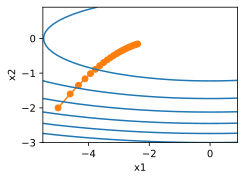

In [1]:
%matplotlib inline
import math
import mindspore
from d2l import mindspore as d2l

def adagrad_2d(x1, x2, s1, s2):
    eps = 1e-6
    g1, g2 = 0.2 * x1, 4 * x2
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta = 0.4
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

epoch 20, x1: -0.002295, x2: -0.000000


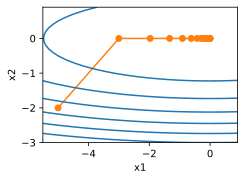

In [2]:
eta = 2
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

### 11.7.4. 从零开始实现

In [3]:
def init_adagrad_states(feature_dim):
    s_w = d2l.zeros((feature_dim, 1))
    s_b = d2l.zeros(1)
    return (s_w, s_b)

def adagrad(params, grads, states, hyperparams):
    eps = 1e-6
    for p, s, g in zip(params, states, grads):
        s[:] += d2l.square(g)
        p[:] -= hyperparams['lr'] * g / d2l.sqrt(s + eps)

loss: 0.242, 0.430 sec/epoch


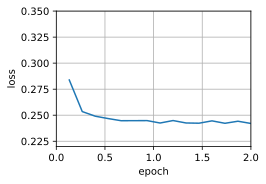

In [4]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adagrad, init_adagrad_states(feature_dim),
               {'lr': 0.1}, data_iter, feature_dim);

### 11.7.5. 简洁实现

loss: 0.243, 0.062 sec/epoch


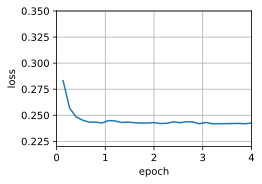

In [5]:
trainer = mindspore.nn.Adagrad
d2l.train_concise_ch11(trainer, {'learning_rate': 0.1}, data_iter)